In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
data =pd.read_csv('IRIS.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
112,6.8,3.0,5.5,2.1,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
36,5.5,3.5,1.3,0.2,Iris-setosa
134,6.1,2.6,5.6,1.4,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
73,6.1,2.8,4.7,1.2,Iris-versicolor
147,6.5,3.0,5.2,2.0,Iris-virginica
90,5.5,2.6,4.4,1.2,Iris-versicolor


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
%matplotlib inline


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>],
       [<Axes: title={'center': 'species'}>, <Axes: >]], dtype=object)

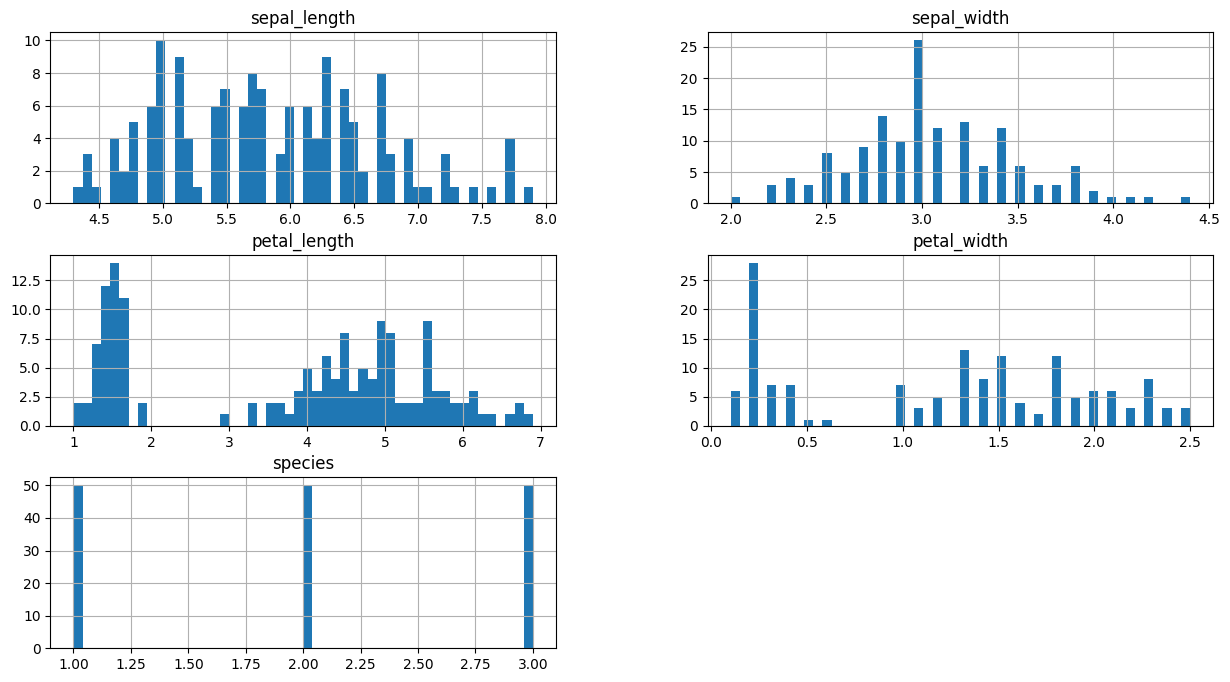

In [21]:
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(15,8))

In [8]:
data['species'] = data['species'].apply(lambda y:1 if y=='Iris-virginica' else 2 if y== 'Iris-versicolor' else 3 )

In [9]:
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,1
94,5.6,2.7,4.2,1.3,2
18,5.7,3.8,1.7,0.3,3
121,5.6,2.8,4.9,2.0,1
0,5.1,3.5,1.4,0.2,3
134,6.1,2.6,5.6,1.4,1
77,6.7,3.0,5.0,1.7,2
16,5.4,3.9,1.3,0.4,3
46,5.1,3.8,1.6,0.2,3
89,5.5,2.5,4.0,1.3,2


In [10]:
X = data.drop('species', axis=1)
y = data['species']

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y , test_size =0.3 ,random_state =12)
 

In [12]:
y_train.value_counts()

species
1    39
2    36
3    30
Name: count, dtype: int64

In [13]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
10,5.4,3.7,1.5,0.2
46,5.1,3.8,1.6,0.2
36,5.5,3.5,1.3,0.2
124,6.7,3.3,5.7,2.1
7,5.0,3.4,1.5,0.2
...,...,...,...,...
76,6.8,2.8,4.8,1.4
3,4.6,3.1,1.5,0.2
130,7.4,2.8,6.1,1.9
134,6.1,2.6,5.6,1.4


In [14]:
#selecting model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators =100)
model.fit(X_train,y_train)



RandomForestClassifier()

## Model Evaluation

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

print('Accuracy Score : ' , accuracy_score(y_test, y_pred)*100,'%')

Accuracy Score :  97.77777777777777 %


In [17]:
from joblib import load, dump

dump(model , 'T3.joblib')

['T3.joblib']

## Input Output 

In [18]:
from joblib import load, dump
model_tr = load('T3.joblib')


In [19]:
print("ENTER THE FEATURES")
n=4 
input_data = ()
for i in X.columns:
    dt = input(f"enter the {i} : ")
    input_data = input_data + tuple(dt)

print(input_data)

ENTER THE FEATURES


enter the sepal_length :  8
enter the sepal_width :  4
enter the petal_length :  6
enter the petal_width :  5


('8', '4', '6', '5')


In [20]:
features= np.asarray(input_data)
res = features.reshape(1,-1)
val=model_tr.predict(res)
output ='Iris-virginica' if val==1 else 'Iris-versicolor' if val==2 else 'Iris-setosa'

print("The flower is :" , output)

The flower is : Iris-virginica


C:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
